In [1]:
!pip install dist/rekomenda-0.1.0-py3-none-any.whl --quiet

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter

from rekomenda.coo import COOMatrix
from rekomenda.csr import CSRMatrix
from rekomenda.csc import CSCMatrix

## Practical 1

In [3]:
def load_data(filepath):
    users = list()
    movies = list()
    ratings = list()

    with open(filepath, 'r') as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            users.append(row[0])
            movies.append(row[1])
            ratings.append(float(row[2]))

        users = np.array(users)
        movies = np.array(movies)
        ratings = np.array(ratings)
        coo_mat = COOMatrix.from_raw_data(users, movies, ratings)

    return coo_mat

        
    

In [5]:
coo_mat = load_data('ml-32m/ratings.csv')

In [6]:
CSRMatrix.from_coo(coo_mat)

CSRMatrix(indptr=array([       0,      141,      801, ..., 32000141, 32000184, 32000204],
      shape=(200949,)), item_indices=array([  927,  1254,  1335, ..., 75839, 79001, 79795], shape=(32000204,)), item_ids=array(['1', '10', '100', ..., '99992', '99996', '99999'],
      shape=(84432,), dtype='<U6'), ratings=array([5. , 5. , 2. , ..., 4. , 2.5, 4.5], shape=(32000204,)), user_ids=array(['1', '10', '100', ..., '99997', '99998', '99999'],
      shape=(200948,), dtype='<U6'), user_counts=array([141, 660, 249, ..., 132,  43,  20], shape=(200948,)), item_counts=array([68997, 32474,  4154, ...,    88,   176,     6], shape=(84432,)), num_users=200948, num_items=84432)

In [8]:
CSCMatrix.from_coo(coo_mat)

CSCMatrix(indptr=array([       0,    68997,   101471, ..., 32000022, 32000198, 32000204],
      shape=(84433,)), user_indices=array([     1,      2,      3, ...,  75777, 151676, 163293],
      shape=(32000204,)), user_ids=array(['1', '10', '100', ..., '99997', '99998', '99999'],
      shape=(200948,), dtype='<U6'), ratings=array([2.5, 5. , 3. , ..., 3. , 3. , 3. ], shape=(32000204,)), item_ids=array(['1', '10', '100', ..., '99992', '99996', '99999'],
      shape=(84432,), dtype='<U6'), user_counts=array([141, 660, 249, ..., 132,  43,  20], shape=(200948,)), item_counts=array([68997, 32474,  4154, ...,    88,   176,     6], shape=(84432,)), num_users=200948, num_items=84432)

In [6]:
user_degrees = Counter(coo_mat.user_indices)
user_degree_values = np.array(list(user_degrees.values()))

movie_degrees = Counter(coo_mat.item_indices)
movie_degree_values = np.array(list(movie_degrees.values()))


In [7]:
user_degree_freq = Counter(user_degree_values)
user_degrees_sorted = sorted(user_degree_freq.keys())
user_frequencies = [user_degree_freq[d] for d in user_degrees_sorted]

# For items
movie_degree_freq = Counter(movie_degree_values)
movie_degrees_sorted = sorted(movie_degree_freq.keys())
movie_frequencies = [movie_degree_freq[d] for d in movie_degrees_sorted]

NameError: name 'alpha_user' is not defined

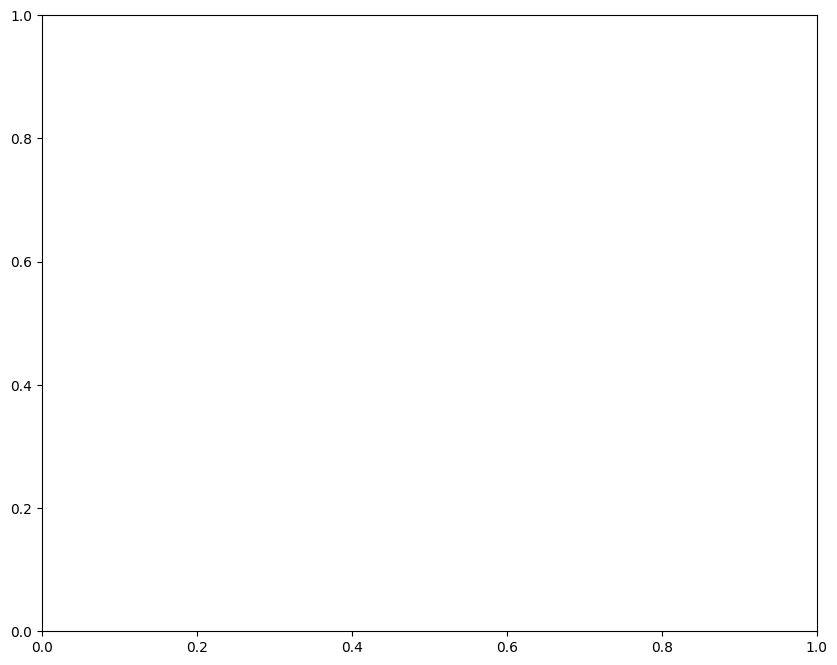

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.loglog(user_degrees_sorted, user_frequencies, 'o', markersize=5, alpha=0.6, 
         color='#2E86AB', label=f'Users (α={alpha_user:.2f})')
ax.loglog(movie_degrees_sorted, movie_frequencies, 's', markersize=5, alpha=0.6, 
         color='#F18F01', label=f'Items (α={alpha_item:.2f})')